### Case Study: Strategic Allocation Between Government Bonds and Corporate Bonds in a Low-Interest-Rate Environment

In this project, we explore the strategic asset allocation between government bonds and corporate bonds in a low-interest-rate environment. The objective is to optimize the portfolio's yield while maintaining an acceptable risk profile.

### Background

#### Fixed Income Instruments Overview

* Government Bonds: Debt securities issued by governments to finance their operations. They are considered low-risk investments with relatively lower yields due to the backing of the government.

* Corporate Bonds: Debt securities issued by corporations to raise capital. They offer higher yields compared to government bonds but come with higher credit risk.
Low-Interest-Rate Environment

* In a low-interest-rate environment, government bond yields are often minimal, prompting investors to seek higher yields from corporate bonds. However, this introduces more credit risk into the portfolio.

#### Mathematical Formulation

We aim to optimize the portfolio's Sharpe Ratio by finding the optimal weights $w$ of government bonds and corporate bonds.

The expected return of the portfolio $R_p$ is calculated as:
$$R_p = w_{\text{gov}} \mu_{\text{gov}} + w_{\text{corp}} \mu_{\text{corp}}$$

The weights of government bonds and corporate bonds sum up to 1:

$$w_{\text{gov}} + w_{\text{corp}} = 1 $$

The portfolio's standard deviation (volatility) $\sigma_p$ is calculated as:

$$\sigma_p = \sqrt{ w_{\text{gov}}^2 \sigma_{\text{gov}}^2 + w_{\text{corp}}^2 \sigma_{\text{corp}}^2 + 2 w_{\text{gov}} w_{\text{corp}} \sigma_{\text{gov}} \sigma_{\text{corp}} \rho_{\text{gov, corp}} }
$$

The Sharpe Ratio $S$ of the portfolio is:

$$S = \frac{ R_p - R_f }{ \sigma_p }$$

where $R_f$ is the risk-free rate.

We aim to optimize the Sharpe Ratio $S$ with respect to the weights $w_{gov}$ and $w_{corp}$:

$$\begin{align*}
\text{Maximize} \quad & S = \frac{ R_p - R_f }{ \sigma_p } \\
\text{Subject to} \quad & w_{\text{gov}} + w_{\text{corp}} = 1 \\
& 0 \leq w_{\text{gov}} \leq 1 \\
& 0 \leq w_{\text{corp}} \leq 1
\end{align*}
$$

### Steps

* Data Acquisition: Obtain historical yield data for government bonds and corporate bonds.

* Risk-Return Analysis: Analyze the historical risk and returns of both asset classes.

* Optimization: Use mean-variance optimization to determine the optimal allocation.
Simulation: Simulate portfolio performance under different interest rate scenarios.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Define the time period
start_date = '2015-01-01'
end_date = '2024-10-01'

# Get the data for government bonds (TLT) and corporate bonds (LQD)
tickers = ['TLT', 'LQD']
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Annualized mean returns and covariance matrix
mean_returns = returns.mean() * 252  # 252 trading days in a year
cov_matrix = returns.cov() * 252

# Define the target return (average of mean returns)
target_return = mean_returns.mean()

# Number of assets
num_assets = len(tickers)
initial_guess = num_assets * [1. / num_assets]
bounds = tuple((0, 1) for _ in range(num_assets))

[*********************100%***********************]  2 of 2 completed


In [15]:
# Define the objective function (portfolio volatility)
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Constraints
constraints = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
    {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
)

# Perform the optimization
optimized = minimize(portfolio_volatility, initial_guess, args=(cov_matrix,),
                     method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = optimized.x
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.2%}")

# Portfolio performance
portfolio_return = np.dot(optimal_weights, mean_returns)
portfolio_volatility = portfolio_volatility(optimal_weights, cov_matrix)

print(f"\nPortfolio Return: {portfolio_return:.2%}")
print(f"Portfolio Volatility: {portfolio_volatility:.2%}")

Optimal Weights:
TLT: 50.00%
LQD: 50.00%

Portfolio Return: 2.00%
Portfolio Volatility: 11.07%


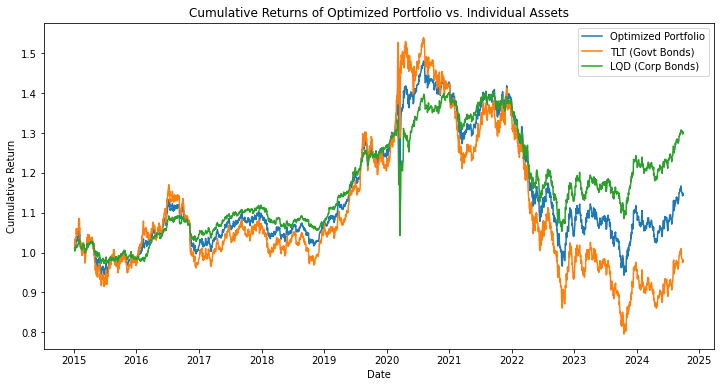

In [16]:
# Plot the cumulative returns
portfolio_returns = returns.dot(optimal_weights)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns, label='Optimized Portfolio')
plt.plot((1 + returns['TLT']).cumprod(), label='TLT (Govt Bonds)')
plt.plot((1 + returns['LQD']).cumprod(), label='LQD (Corp Bonds)')
plt.title('Cumulative Returns of Optimized Portfolio vs. Individual Assets')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

### Interpretation

* Optimal Weights: The optimized weights provide a balance between government and corporate bonds to maximize the Sharpe Ratio.

* Cumulative Returns: The optimized portfolio shows better risk-adjusted returns compared to investing solely in TLT or LQD.

* Risk-Return Trade-off: Incorporating corporate bonds enhances yield but increases credit risk; the optimization helps balance this trade-off.

### Recommended Next Steps
* Include More Fixed-Income Assets: Add other government and corporate bond ETFs to enhance diversification.

* Analyze Different Time Periods: See how changing the time frame affects returns and volatilities.

* Consider Alternative Strategies: Explore factor investing, liability-driven investment (LDI) strategies, or immunization techniques.

* Use Rolling Windows: Implement rolling-window analyses to observe how optimal weights change over time.